## Example usage of synthetic rate track

Note: The star match algorithm only works on macOS or linux

The rate_track_info class searches for moving objects within an image upon initialization contains the following attributes:

num_velocities: The integer of different velocities that were probed

data_path: The name of file of images (string) in which the search was performed on

file_names: A list of strings that contain the names of all the fits files being utilized

velocity_grid: A cupy array of the velocities

vel_idx_dict: A dictionary that converts a tuple velocity (ie (3,-1)) to an index on the data_cube

astrometric_solution: The solution provided by the star matching algorithm - see astrometry.net for more info

preprocessed_frames: A list of cupy arrays containing images to be investigated after background correction and star removal

data_cube: A list of cupy arrays that contain all the images post velocity shift for every velocity vector on the velocity grid

heatmap: A cupy array consisting of all maximal signal from each velocity shift result

heatmap_peaks: A numpy array that represents the peaks of the heatmap

hits: A list of numpy arrays that contain the most refined images of detected objects

hit_info: A string containing all of the refined metrics of detected objects

In [2]:
from rate_track import rate_tracked_info
results = rate_tracked_info('Trial1', 1000)

In [3]:
hit_info = results.hit_info
hits = results.hits

Detected object at moving at velocity <0.2484612139660639 -0.5088015360772182> in RA, Dec degrees/second. 
Detected object at moving at velocity <-0.9920544384634394 -0.05408676075552776> in RA, Dec degrees/second. 
Detected object at moving at velocity <0.8610865649436477 -0.016738881796761418> in RA, Dec degrees/second. 



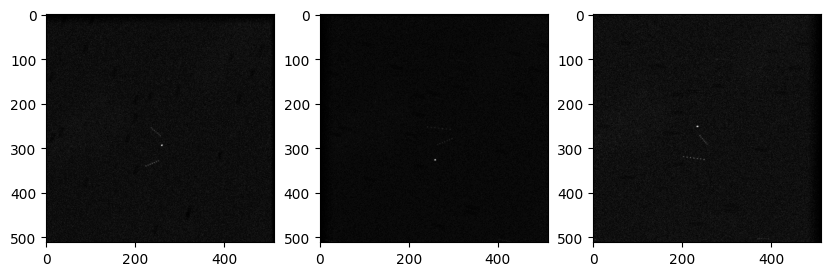

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 10]
for i, hit in enumerate(hits):
    plt.subplot(1, len(hits), i + 1)
    plt.imshow(hit, cmap="Greys_r")

print(results.hit_info)